In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
data = pd.read_csv('AusApparalSales4thQrt2020.csv')
data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [3]:
data.shape

(7560, 6)

In [4]:
missing_values = data.isna()
not_missing_values = data.notna()
print(missing_values)
print(not_missing_values)

rows_with_missing_data = data[data.isna().any(axis=1)]
print(rows_with_missing_data)

       Date   Time  State  Group   Unit  Sales
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
7555  False  False  False  False  False  False
7556  False  False  False  False  False  False
7557  False  False  False  False  False  False
7558  False  False  False  False  False  False
7559  False  False  False  False  False  False

[7560 rows x 6 columns]
      Date  Time  State  Group  Unit  Sales
0     True  True   True   True  True   True
1     True  True   True   True  True   True
2     True  True   True   True  True   True
3     True  True   True   True  True   True
4     True  True   True   True  True   True
...    ...   ...    ...    ...   ...    ...
7555  True  True   True   True  True   True
7556  True  True   True   True  True   True
7557  True  Tru

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [6]:
data.describe(include='all')

,Date,Time,State,Group,Unit,Sales
count,7560,7560,7560,7560,7560.000000,7560.000000
unique,90,3,7,4,NaN,NaN
top,1-Oct-2020,Morning,WA,Kids,NaN,NaN
freq,84,2520,1080,1890,NaN,NaN
mean,NaN,NaN,NaN,NaN,18.005423,45013.558201
std,NaN,NaN,NaN,NaN,12.901403,32253.506944
min,NaN,NaN,NaN,NaN,2.000000,5000.000000
25%,NaN,NaN,NaN,NaN,8.000000,20000.000000
50%,NaN,NaN,NaN,NaN,14.000000,35000.000000
75%,NaN,NaN,NaN,NaN,26.000000,65000.000000


In [7]:
data['Time'].value_counts()

Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64

In [8]:
data['State'].value_counts()

State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64

In [9]:
data["Group"].value_counts()

Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64

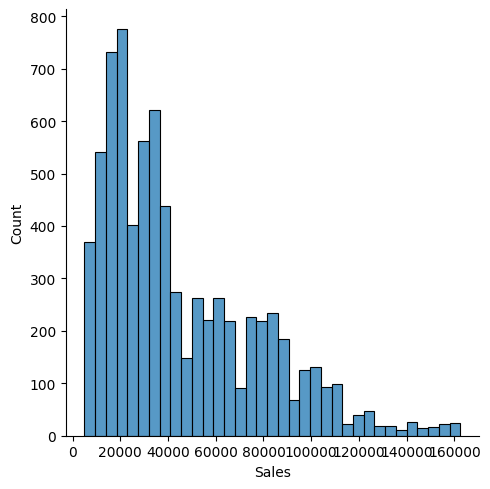

In [10]:
sns.displot(data['Sales'],kde=False)

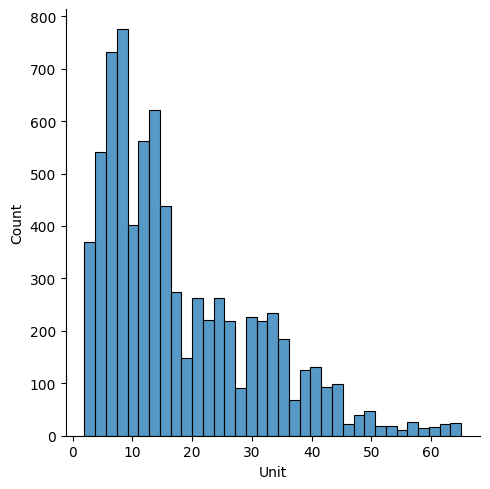

In [11]:
sns.displot(data['Unit'],kde=False)

In [12]:
#sns.heatmap(data[['Sales','Unit']].corr(), annot=True)

In [13]:
#separating numerical and categorical data

data_num = data[['Sales','Unit']]

In [14]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
power_datanum = pd.DataFrame(pt.fit_transform(data_num))
power_datanum.columns = data_num.columns
power_datanum.head()

,Sales,Unit
0,-0.741517,-0.751204
1,-0.741517,-0.751204
2,-1.539542,-1.541461
3,0.056807,0.058166
4,-1.847360,-1.832128


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].head()

0   2020-10-01
1   2020-10-01
2   2020-10-01
3   2020-10-01
4   2020-10-01
Name: Date, dtype: datetime64[ns]

In [6]:
# Apply min-max normalization to the 'Unit' and 'Sales' columns
normalized_data = data.copy()

normalized_data['Unit'] = (normalized_data['Unit'] - normalized_data['Unit'].min()) / (normalized_data['Unit'].max() - normalized_data['Unit'].min())
normalized_data['Sales'] = (normalized_data['Sales'] - normalized_data['Sales'].min()) / (normalized_data['Sales'].max() - normalized_data['Sales'].min())

In [14]:
# Grouping by 'State' and aggregating the total 'Sales' and 'Unit' counts
state_sales = data.groupby('State').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

# Grouping by 'Group' and aggregating the total 'Sales' and 'Unit' counts
group_sales = data.groupby('Group').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

# Grouping by 'Time' to see the distribution of sales across different times of the day
time_sales = data.groupby('Time').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

state_sales, group_sales, time_sales

print(f"{pd.DataFrame(state_sales)}\n\n{pd.DataFrame(group_sales)}\n\n{pd.DataFrame(time_sales)}")

  State      Sales   Unit
0   NSW   74970000  29988
1    NT   22580000   9032
2   QLD   33417500  13367
3    SA   58857500  23543
4   TAS   22760000   9104
5   VIC  105565000  42226
6    WA   22152500   8861

      Group     Sales   Unit
0      Kids  85072500  34029
1       Men  85750000  34300
2   Seniors  84037500  33615
3     Women  85442500  34177

         Time      Sales   Unit
0   Afternoon  114007500  45603
1     Evening  112087500  44835
2     Morning  114207500  45683


Here are the insights derived using the groupby function:

1. State-wise Sales:
VIC (Victoria) has the highest sales at $105,565,000 with 42,226 units sold.
NSW (New South Wales) follows with sales of $74,970,000 and 29,988 units sold.
WA (Western Australia) and NT (Northern Territory) have the lowest sales, indicating areas for potential growth.

2. Group-wise Sales:
Men's clothing leads in sales at $85,750,000 with 34,300 units sold.
Women, Kids, and Seniors groups have similar sales figures, indicating a balanced demand across different age groups.

3. Time-wise Sales:
Morning and Afternoon times have the highest sales, slightly edging out Evening sales, suggesting peak shopping hours are earlier in the day.

These insights can be used to tailor marketing strategies, optimize store hours, and identify potential areas for growth.